## Linear Models

일반적으로 statsmodels와 sklearn에서의 Linear Model들은 다음과 같은 부분에서 문제점이 발생한다

1. 모형이 데이터 의존적이다. 학습 데이터의 품질에 따라 편향이 심할 수도 있다.
2. 데이터의 수가 모형의 복잡도에 비해 적은 경우, Overfitting의 문제가 심각해진다

이러한 문제들을 해결하기 위해, 다음과 같은 모형들이 제안되었다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Linear Model Optimization

OLS Regression (Linear Model)을 다시 한 번 살펴보자

$$\mathbf{y}_i = \mathbf{\beta}_i \mathbf{x}_i + \mathbf{\epsilon}_i$$

최소제곱법을 활용해 Optimization을 수행하는데, 이는 다음과 같은 최적화 문제로 풀 수 있다

$$\min \sum_{i=0}^N (\mathbf{y}_i - \mathbf{\hat {y}}_i)^2$$
$$= \min \sum_{i=0}^N (\mathbf{y}_i - \mathbf{x}_i\mathbf{\beta}_i)^2$$

y에 대한 2차식이기 때문에, 도함수를 활용하여 다음과 같이 최적해를 계산할 수 있다

$$\frac{\partial}{\partial \beta_i} \mathrm{MSE(\beta_i)} = \frac{2}{N} \sum_{i=0}^N (\mathbf{y}_i - \mathbf{x}_i\mathbf{\beta}_i)\mathbf{\beta}_i$$

In [2]:
import statsmodels.api as sm
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

X, y = datasets.fetch_openml('boston', return_X_y = True, parser = 'auto')

X = X.astype(float)
y = y.astype(float)

In [3]:
ols = sm.OLS(
    y, sm.add_constant(X)
).fit()

In [4]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):          6.72e-135
Time:                        00:19:28   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

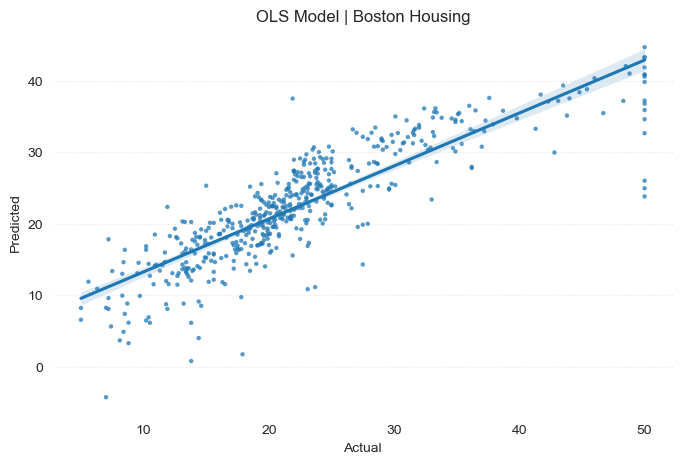

In [5]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y, 
    y = ols.fittedvalues, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('OLS Model | Boston Housing')
plt.show()

### 2. Ridge Regression

Ridge Regression은 1970년대 회귀모형의 일반화 성능을 향상시키기 위해 Hoerl와 Kennard에 의해 처음으로 소개되었다. MSE에 일정한 Penalty를 부과하여 적합화가 덜 되도록 유도한다

$$\min \sum_{i=0}^N (\mathbf{y}_i - \mathbf{x}_i\mathbf{\beta}_i)^2 + \frac{\alpha}{2} \sum_{i=0}^N \beta_i^2$$

Machine Learing에서는 이를 흔히 **L2 Reguralization (L2 정규화)** 라고 한다. 선형 모형에서는 대부분 Hyper Parameter로 지정 가능하다

```
sklearn.linear_model.Ridge(
    alpha=1.0, *, 
    fit_intercept=True, 
    copy_X=True, 
    max_iter=None, 
    tol=0.0001, 
    solver='auto', 
    positive=False, 
    random_state=None
)
```

Ridge Regression에서 손실 함수는 다음과 같다

$$L(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \alpha \boldsymbol{\beta}^T \boldsymbol{\beta}$$

여기서 첫 번째 항은 예측값과 실제값의 차이, 즉 잔차 제곱합이고, 두 번째 항은 패널티 항이다. $\alpha$는 정규화 정도를 조정하는 하이퍼파라미터로, 계수들이 너무 커지지 않도록 제약을 부여한다.

이 손실 함수를 $\boldsymbol{\beta}$에 대해 미분하여 Ridge Regression의 해를 구할 수 있다. 손실 함수의 미분 결과는 다음과 같다:

$$\frac{\partial L}{\partial \boldsymbol{\beta}} = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + 2 \alpha \boldsymbol{\beta}$$

이것을 0으로 두고 $\boldsymbol{\beta}$에 대해 풀면

$$\mathbf{X}^T \mathbf{X} \boldsymbol{\beta} + \alpha \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y}$$

즉, $\boldsymbol{\beta}$에 대한 해는 다음과 같다

$$\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y}$$

여기서 $\mathbf{I}$는 단위 행렬이다. 이 식에서 $\alpha$가 Ridge 패널티 항을 나타내며, $\alpha$가 커질수록 계수들의 크기를 더 강하게 제한하게 된다. 이는 과적합을 줄이고 모델의 일반화 성능을 높이는 데 기여한다.

In [6]:
ridge = sm.OLS(
    y, sm.add_constant(X)
).fit_regularized(method = 'elastic_net', L1_wt = 0, alpha = 0.01)

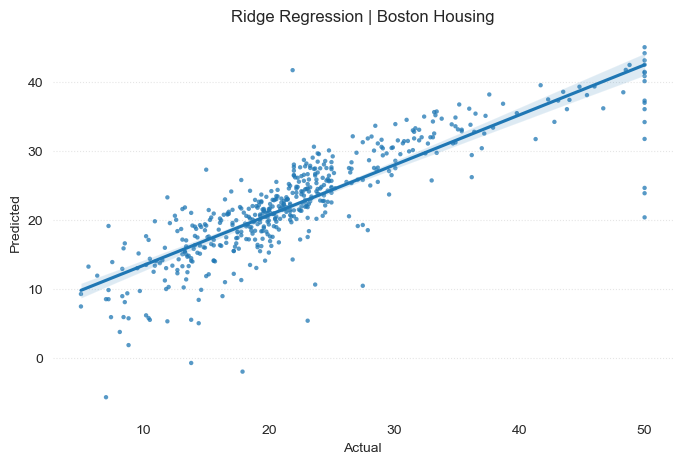

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y, 
    y = ridge.fittedvalues, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Ridge Regression | Boston Housing')
plt.show()

In [8]:
from sklearn.linear_model import Ridge
ridge_sklearn = Ridge(alpha = 0.01) 
ridge_sklearn.fit(sm.add_constant(X), y)

Ridge(alpha=0.01)

In [9]:
print(f'R squared : {ridge_sklearn.score(sm.add_constant(X), y) : .4f}')

R squared :  0.7406


#### 2.1 Bayesian Approach

Bayesian 관점에서 보면, Ridge Regression은 $\boldsymbol{\beta}$에 대해 정규분포를 가정한 Bayesian 회귀의 특수한 경우로 해석될 수 있다. 구체적으로, $\boldsymbol{\beta}$에 대해 다음과 같은 사전 분포(prior)를 부여한다고 가정한다

$$p(\boldsymbol{\beta}) = \mathcal{N}(0, \sigma^2 \mathbf{I})$$

즉, $\boldsymbol{\beta}$는 평균이 0이고 공분산이 $\sigma^2 \mathbf{I}$인 정규분포를 따른다고 가정하는 것이다. 이는 $\boldsymbol{\beta}$가 지나치게 커지지 않도록 제한하는 역할을 하며, 이는 Ridge Regression의 L2 정규화 항과 동일한 효과를 낸다.

Ridge Regression에서의 패널티 항 $\frac{\alpha}{2} \boldsymbol{\beta}^T \boldsymbol{\beta}$는 Bayesian 관점에서 이 사전 분포에 해당한다.

**Likelihood Function**

데이터 $\mathbf{y}$가 주어졌을 때, Ridge Regression에서의 우도 함수는 다음과 같이 정규분포로 가정된다

$$p(\mathbf{y}|\boldsymbol{\beta}) = \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2)$$

이는 주어진 입력 데이터 $\mathbf{X}$와 계수 $\boldsymbol{\beta}$에 대해 출력 $\mathbf{y}$가 정규분포를 따른다는 가정이다. 여기서 $\mathbf{X} \boldsymbol{\beta}$는 예측값을 나타내고, $\sigma^2$는 오차의 분산이다.

**Posterior Probability**

Bayesian 회귀에서는 사전 확률과 우도 함수를 결합하여 사후 확률을 계산한다. 사후 확률은 다음과 같이 베이즈 정리에 의해 계산된다

$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) \propto p(\mathbf{y}|\boldsymbol{\beta}) \cdot p(\boldsymbol{\beta})$$

여기서 $p(\boldsymbol{\beta})$는 계수 $\boldsymbol{\beta}$가 따르는 정규분포 사전 확률이며, $p(\mathbf{y}|\boldsymbol{\beta})$는 데이터에 기반한 우도 함수다

**Posterior Distribution**

이 사후 확률은 다시 정규분포의 형태를 가지며, Ridge Regression의 해와 동일한 결과를 도출하게 된다. 사후 분포는 다음과 같이 표현된다

$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) = \mathcal{N}(\hat{\boldsymbol{\beta}}, \mathbf{C})$$

여기서 $\hat{\boldsymbol{\beta}}$는 Ridge Regression의 해를 나타내며, $\mathbf{C}$는 공분산 행렬이다. 이는 Ridge의 L2 규제가 계수들의 크기를 제한하고, 그 결과로 모델의 복잡도를 낮추어 과적합을 방지한다는 것을 의미한다

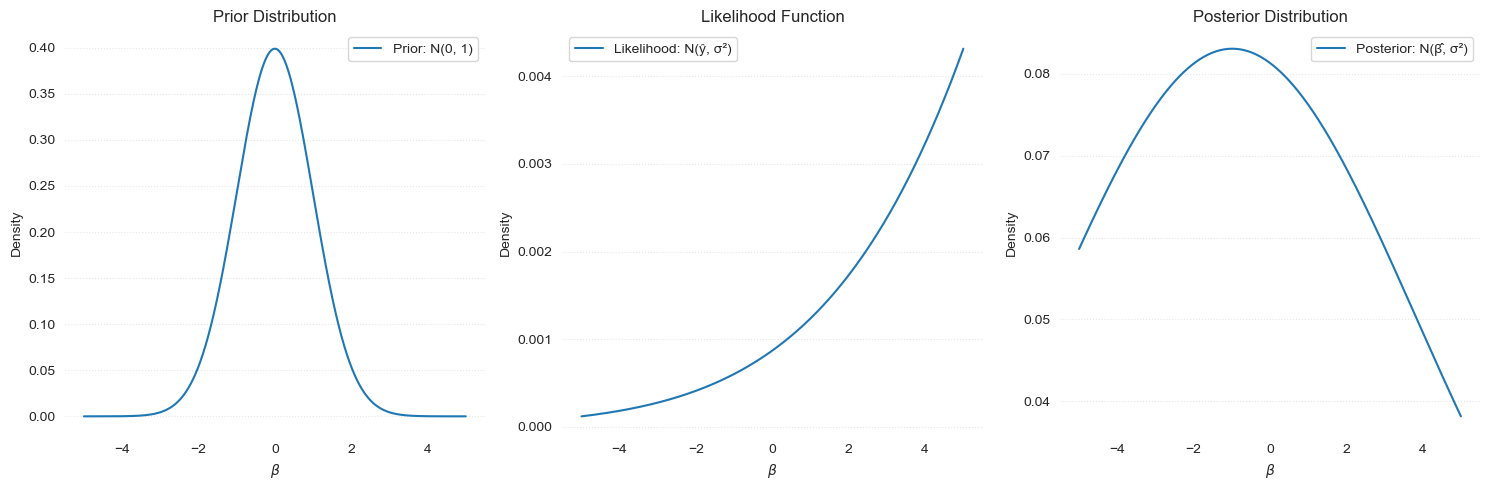

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

mu_prior = 0
sigma_prior = 1.0
beta_range = np.linspace(-5, 5, 1000)
prior = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-0.5 * ((beta_range - mu_prior) ** 2) / sigma_prior ** 2)
ax[0].plot(beta_range, prior, label="Prior: N(0, 1)")
ax[0].set_title('Prior Distribution')
ax[0].set_xlabel(r'$\beta$')
ax[0].set_ylabel('Density')
ax[0].legend()
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].yaxis.grid(True, ls = ':', alpha = 0.5) 

mu_likelihood = np.mean(ridge_sklearn.predict(sm.add_constant(X)))
sigma_likelihood = np.std(ridge_sklearn.predict(sm.add_constant(X)))
likelihood = (1 / (np.sqrt(2 * np.pi) * sigma_likelihood)) * np.exp(-0.5 * ((beta_range - mu_likelihood) ** 2) / sigma_likelihood ** 2)
ax[1].plot(beta_range, likelihood, label="Likelihood: N(ŷ, σ²)")
ax[1].set_title('Likelihood Function')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel('Density')
ax[1].legend()
for spine in ax[1].spines.values():
    spine.set_visible(False)
ax[1].grid(False)
ax[1].yaxis.grid(True, ls = ':', alpha = 0.5) 

mu_posterior = ridge_sklearn.coef_.mean()
sigma_posterior = np.std(ridge_sklearn.coef_)
posterior = (1 / (np.sqrt(2 * np.pi) * sigma_posterior)) * np.exp(-0.5 * ((beta_range - mu_posterior) ** 2) / sigma_posterior ** 2)
ax[2].plot(beta_range, posterior, label="Posterior: N(β̂, σ²)")
ax[2].set_title('Posterior Distribution')
ax[2].set_xlabel(r'$\beta$')
ax[2].set_ylabel('Density')
ax[2].legend()
for spine in ax[2].spines.values():
    spine.set_visible(False)
ax[2].grid(False)
ax[2].yaxis.grid(True, ls = ':', alpha = 0.5) 

plt.tight_layout()
plt.show()

### 3. Lasso Regression

Lasso Regression은 1996년에 Robert Tibshirani에 의해 처음으로 제안된 모형이다. 최적화 과정에서 규제항을 추가해 일부 계수를 0으로 추정되도록 규제한다. 이는 일종의 변수 선택 효과라고 해석해도 좋다

$$\min \sum_{i=0}^N (\mathbf{y}_i - \mathbf{x}_i\mathbf{\beta}_i)^2 + \alpha \sum_{i=0}^N |\beta_i|$$

Machine Learing에서는 이를 흔히 **L1 Reguralization (L1 정규화)** 라고 한다. Ridge Regression과 마찬가지로 선형 모형에서 대부분 Hyper Parameter로 지정 가능하다

```
sklearn.linear_model.Lasso(
    alpha=1.0, *, 
    fit_intercept=True, 
    precompute=False, 
    copy_X=True, 
    max_iter=1000, 
    tol=0.0001, 
    warm_start=False, 
    positive=False, 
    random_state=None, 
    selection='cyclic'
)
```

Lasso Regression은 과적합을 해결하기 위해 L1 규제항을 사용해서 특정 계수를 0으로 만들고, 이를 통해 변수 선택을 가능하게 한다. 손실 함수는 다음과 같이 주어진다

$$L(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \alpha \sum_{i=1}^p |\beta_i|$$

첫 번째 항은 잔차 제곱합이고, 두 번째 항은 L1 규제 항이다. 이 L1 규제는 계수들의 절대값에 패널티를 부과한다. 여기서 $\alpha$는 패널티의 크기를 조정하는 하이퍼파라미터이다. Lasso는 L1 규제를 통해 일부 계수 $\beta_i$를 0으로 만들어서, 자동으로 변수 선택이 이루어지게 한다. 

Lasso Regression에서 손실 함수를 $\boldsymbol{\beta}$에 대해 미분하는 과정은 일반적인 함수와 달리 복잡하다. L1 패널티 항이 절대값이기 때문에 이를 직접 미분할 수 없다. 그러나 편의상, 두 가지 경우로 나누어 계산할 수 있다.

1. $\beta_i > 0$일 때는 절대값이 그대로 미분되어 $\frac{\partial}{\partial \beta_i} |\beta_i| = 1$
2. $\beta_i < 0$일 때는 절대값이 미분되어 $\frac{\partial}{\partial \beta_i} |\beta_i| = -1$

결과적으로, 손실 함수를 미분한 식은 다음과 같다

$$\frac{\partial L}{\partial \boldsymbol{\beta}} = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \alpha \cdot \mathbf{sgn}(\boldsymbol{\beta})$$

여기서 $\mathbf{sgn}(\boldsymbol{\beta})$는 계수 $\boldsymbol{\beta}$의 부호를 나타낸다. Lasso는 위에서 구한 미분식을 이용해 최적화를 진행한다. L1 규제는 특정한 $\beta_i$가 정확히 0이 되도록 만들기 때문에, 계수들 중 일부는 0으로 수렴한다. 이 과정에서 Lasso는 자동으로 변수 선택 효과를 제공하여, Overfitting을 방지하는데 기여를 한다.

In [11]:
lasso = sm.OLS(
    y, sm.add_constant(X)
).fit_regularized(method = 'elastic_net', L1_wt = 1, alpha = 0.01)

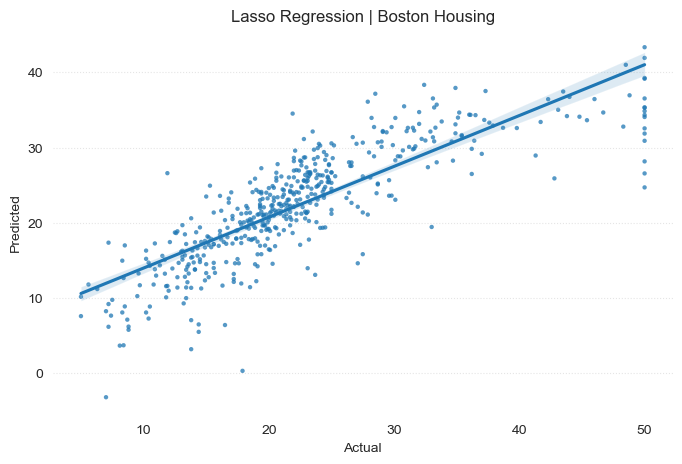

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y, 
    y = lasso.fittedvalues, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Lasso Regression | Boston Housing')
plt.show()

In [13]:
from sklearn.linear_model import Lasso
lasso_sklearn = Lasso(alpha = 0.01) 
lasso_sklearn.fit(sm.add_constant(X), y)

Lasso(alpha=0.01)

In [14]:
print(f'R squared : {lasso_sklearn.score(sm.add_constant(X), y) : .4f}')

R squared :  0.7402


#### 3.1 Bayesian Approach

Lasso Regression의 손실 함수

$$L(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + \alpha \sum_{i=1}^p |\beta_i|$$

에서 $\alpha \sum_{i=1}^p |\beta_i|$는 L1 패널티 항이다. 이 항은 Bayesian 관점에서 계수 $\boldsymbol{\beta$}가 Laplace 분포를 따른다는 가정과 동일한 효과를 가진다. Laplace 분포는 다음과 같이 표현된다

$$p(\beta_i) = \frac{\lambda}{2} \exp(-\lambda |\beta_i|)$$

여기서 $\lambda$는 라플라스 분포의 스케일 파라미터로, L1 규제에서의 $\alpha$와 연결된다. 이 사전 확률을 계수 $\beta_i$에 대해 가정함으로써, 계수들이 0에 가까워질 가능성이 커지게 되고, 일부 계수들이 0으로 수렴하게 된다. 이는 Lasso의 변수 선택 효과를 설명한다.

**Posterior Probability**

Bayesian 회귀에서는 사전 확률(prior)과 데이터에 기반한 우도(likelihood)를 결합하여 사후 확률(posterior)을 구한다. 우도 함수는 일반적으로 정규분포로 가정하며, 데이터 $\mathbf{y}$가 주어졌을 때의 우도는 다음과 같다

$$p(\mathbf{y}|\boldsymbol{\beta}) = \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2)$$

즉, 주어진 입력 $\mathbf{X}$와 계수 $\boldsymbol{\beta}$로부터 출력 $\mathbf{y}$가 정규분포를 따른다고 가정한다.

**Posterior Distribution**

사후 확률은 베이즈 정리에 따라 다음과 같이 계산된다

$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) \propto p(\mathbf{y}|\boldsymbol{\beta}) \cdot p(\boldsymbol{\beta})$$

여기서 $p(\boldsymbol{\beta})$는 라플라스 분포로 주어진 사전 확률이며, $p(\mathbf{y}|\boldsymbol{\beta})$는 데이터의 우도이다. 사후 확률을 최대화하면, 이는 Lasso 회귀의 해와 동일하게 나타난다. Lasso의 L1 규제 항이 라플라스 분포의 사전 확률을 반영하고, 이를 통해 모델이 과적합을 방지하게 된다.

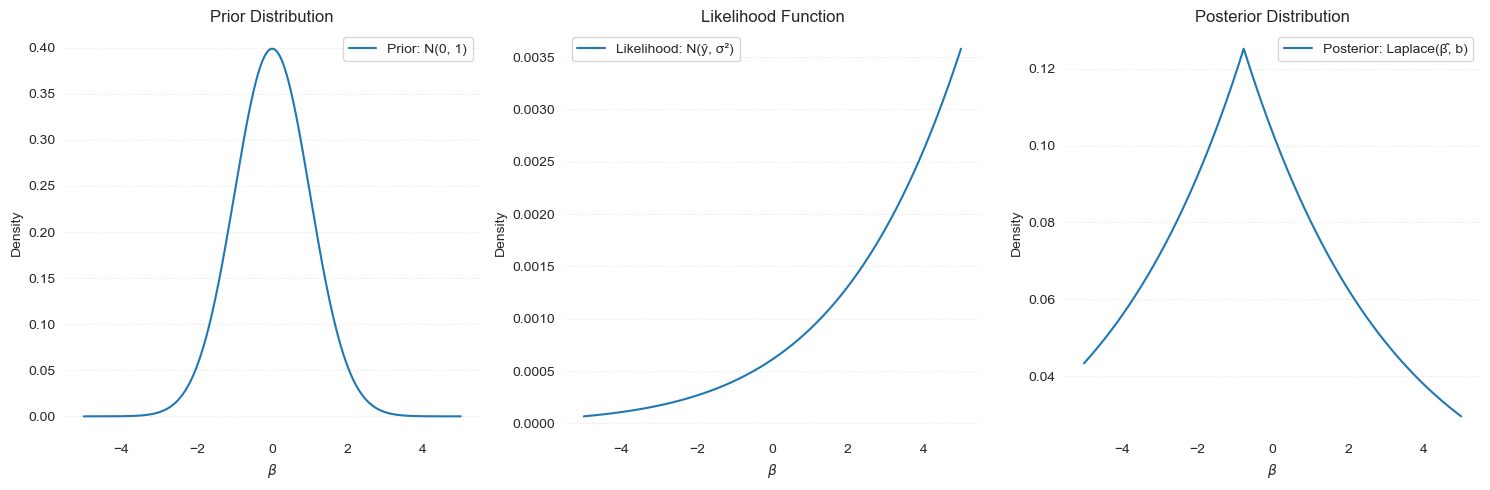

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

mu_prior = 0
sigma_prior = 1.0
beta_range = np.linspace(-5, 5, 1000)
prior = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-0.5 * ((beta_range - mu_prior) ** 2) / sigma_prior ** 2)
ax[0].plot(beta_range, prior, label="Prior: N(0, 1)")
ax[0].set_title('Prior Distribution')
ax[0].set_xlabel(r'$\beta$')
ax[0].set_ylabel('Density')
ax[0].legend()
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].yaxis.grid(True, ls=':', alpha=0.5)

mu_likelihood = np.mean(lasso.predict(sm.add_constant(X)))
sigma_likelihood = np.std(lasso.predict(sm.add_constant(X)))
likelihood = (1 / (np.sqrt(2 * np.pi) * sigma_likelihood)) * np.exp(-0.5 * ((beta_range - mu_likelihood) ** 2) / sigma_likelihood ** 2)
ax[1].plot(beta_range, likelihood, label="Likelihood: N(ŷ, σ²)")
ax[1].set_title('Likelihood Function')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel('Density')
ax[1].legend()
for spine in ax[1].spines.values():
    spine.set_visible(False)
ax[1].grid(False)
ax[1].yaxis.grid(True, ls=':', alpha=0.5)

mu_posterior = lasso_sklearn.coef_.mean()
sigma_posterior = np.std(lasso_sklearn.coef_)
posterior = (1 / (2 * sigma_posterior)) * np.exp(-np.abs(beta_range - mu_posterior) / sigma_posterior)  # 라플라스 분포
ax[2].plot(beta_range, posterior, label="Posterior: Laplace(β̂, b)")
ax[2].set_title('Posterior Distribution')
ax[2].set_xlabel(r'$\beta$')
ax[2].set_ylabel('Density')
ax[2].legend()
for spine in ax[2].spines.values():
    spine.set_visible(False)
ax[2].grid(False)
ax[2].yaxis.grid(True, ls=':', alpha=0.5)

plt.tight_layout()
plt.show()

### 4. Elastic Net Regression

Elastic Net은 Ridge와 Lasso를 모두 절충한 선형 모형이다. 다음과 같이 최적화를 수행한다.

$$\min \sum_{i=0}^N (\mathbf{y}_i - \mathbf{x}_i\mathbf{\beta}_i)^2 + r\alpha \sum_{i=0}^N |\beta_i| + \frac{(1-r)\alpha}{2} \sum_{i=0}^N \beta_i^2$$

```
sklearn.linear_model.ElasticNet(
    alpha=1.0, *, 
    l1_ratio=0.5, 
    fit_intercept=True, 
    precompute=False, 
    max_iter=1000, 
    copy_X=True, 
    tol=0.0001, 
    warm_start=False, 
    positive=False, 
    random_state=None, 
    selection='cyclic'
)
```

식에서 $r$은 L1 규제를 얼마나 할지 비율을 정하는 Hyperparameter이며, sklearn의 ElasticNet에서는 `l1_ratio`로 지정할 수 있다.

Elastic Net의 손실 함수는 다음과 같이 두 가지 규제 항을 포함한다

$$L(\boldsymbol{\beta}) = \sum_{i=1}^N (\mathbf{y}_i - \mathbf{x}_i \boldsymbol{\beta})^2 + r\alpha \sum_{i=1}^p |\beta_i| + \frac{(1-r)\alpha}{2} \sum_{i=1}^p \beta_i^2$$

이 식을 더 자세히 풀어서 설명하면:

1. 첫 번째 항 $\sum_{i=1}^N (\mathbf{y}_i - \mathbf{x}_i \boldsymbol{\beta})^2$는 잔차 제곱합으로, 예측값 $\mathbf{x}_i \boldsymbol{\beta}$와 실제값 $\mathbf{y}_i$의 차이를 나타낸다. 이는 모델이 데이터를 얼마나 잘 설명하는지를 측정하는 항이다.
2. 두 번째 항 $r\alpha \sum_{i=1}^p |\beta_i|$는 Lasso에서의 L1 규제 항이다. 이 항은 계수들의 절대값을 더한 것이며, 일부 계수들이 정확히 0이 되도록 유도한다. 이를 통해 변수 선택이 자동으로 이루어진다. $r$은 L1 규제의 비중을 결정하는 파라미터로, Lasso의 영향을 조정하는 역할을 한다.
3. 세 번째 항 $\frac{(1-r)\alpha}{2} \sum_{i=1}^p \beta_i^2$는 Ridge에서의 L2 규제 항이다. 이 항은 계수들의 제곱합으로, 계수들의 크기를 제한하여 모델이 너무 복잡해지지 않도록 한다. $\alpha$는 규제의 강도를 조절하는 하이퍼파라미터이며, $(1-r)$은 L2 규제의 비중을 결정한다.

Elastic Net의 손실 함수는 Lasso와 Ridge의 규제 항을 결합하여, 각 규제의 비중을 $r$과 $1-r$으로 나누어 적용한다. 따라서 $r = 1$일 때는 Lasso와 동일하고, $r = 0$일 때는 Ridge와 동일하게 된다. 일반적으로 $r$ 값은 0과 1 사이로 설정되어 두 규제를 동시에 적용하게 된다

**Optimization**

Elastic Net의 손실 함수를 계수 $\boldsymbol{β}$에 대해 미분하면 다음과 같은 식이 도출된다. 먼저, 손실 함수에서 잔차 제곱합을 미분하면

$$\frac{\partial}{\partial \boldsymbol{\beta}} \sum_{i=1}^N (\mathbf{y}_i - \mathbf{x}_i \boldsymbol{\beta})^2 = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})$$

L1 규제 항에 대한 미분은 절대값 함수 때문에 방향에 따라 달라지며, 그 부호를 나타내는 $\boldsymbol{\text{sgn}}(\boldsymbol{β})$를 사용하여 다음과 같이 표현된다. 

$$\frac{\partial}{\partial \boldsymbol{\beta}} r\alpha \sum_{i=1}^p |\beta_i| = r\alpha \cdot \mathbf{sgn}(\boldsymbol{\beta})$$

L2 규제 항에 대한 미분은 다음과 같다

$$\frac{\partial}{\partial \boldsymbol{\beta}} \frac{(1-r)\alpha}{2} \sum_{i=1}^p \beta_i^2 = (1-r)\alpha \boldsymbol{\beta}$$

이 세 항을 결합하면, Elastic Net 손실 함수의 미분식은 다음과 같이 표현된다

$$\frac{\partial L}{\partial \boldsymbol{\beta}} = -2 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \boldsymbol{\beta}) + r\alpha \cdot \mathbf{sgn}(\boldsymbol{\beta}) + (1-r)\alpha \boldsymbol{\beta}$$

이 식을 0으로 두고 $\boldsymbol{\beta}$에 대해 최적화를 수행하여 Elastic Net의 해를 구한다. Elastic Net은 Lasso의 L1 규제와 Ridge의 L2 규제를 결합함으로써 과적합을 방지한다.

- Lasso 효과: L1 규제 항 $r\alpha \sum_{i=1}^p |\beta_i|$는 일부 계수를 0으로 만들어 변수 선택을 자동으로 수행하며, 이를 통해 모델이 불필요한 변수에 과적합하는 것을 막는다.
- Ridge 효과: L2 규제 항 $\frac{(1-r)\alpha}{2} \sum_{i=1}^p \beta_i^2$는 계수들의 크기를 작게 만들어 모델의 복잡성을 줄이고, 모델이 과적합되는 것을 방지한다.

In [16]:
elastic = sm.OLS(
    y, sm.add_constant(X)
).fit_regularized(method = 'elastic_net', L1_wt = 0.5, alpha = 0.01)

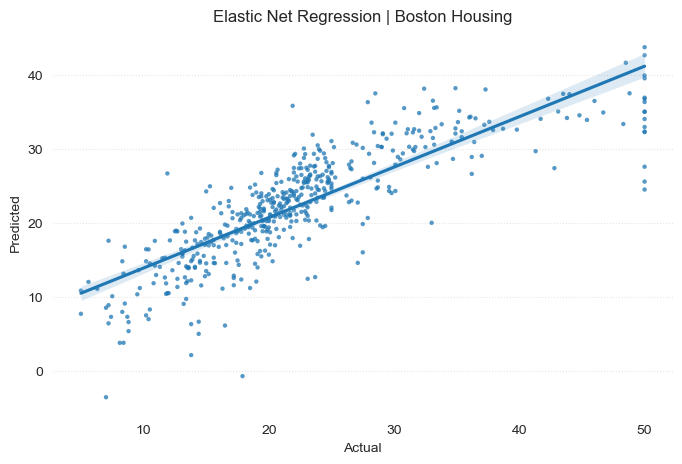

In [17]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(
    x = y, 
    y = elastic.fittedvalues, 
    scatter_kws = {'s' : 10, 'edgecolor' : 'None', 'marker' : '.', 'alpha' : 0.75},
    ax=ax
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Elastic Net Regression | Boston Housing')
plt.show()

In [18]:
from sklearn.linear_model import ElasticNet
elastic_sklearn = ElasticNet(alpha = 0.01, l1_ratio = 0.5) 
elastic_sklearn.fit(sm.add_constant(X), y)

ElasticNet(alpha=0.01)

In [19]:
print(f'R squared : {elastic_sklearn.score(sm.add_constant(X), y) : .4f}')

R squared :  0.7356


#### 4.1 Bayesian Approach

Elastic Net을 Bayesian 관점에서 해석할 수 있다. Elastic Net은 계수 \boldsymbol{\beta}가 라플라스 분포와 정규분포의 결합된 사전 확률을 가진다고 해석할 수 있다.

- Lasso 부분: L1 규제 항인 $r\alpha \sum_{i=1}^p |\beta_i|$는 라플라스 분포에 해당한다. 라플라스 분포는 다음과 같이 표현된다

$$p(\beta_i) = \frac{\lambda_1}{2} \exp(-\lambda_1 |\beta_i|)$$

여기서 $\lambda_1$은 라플라스 분포의 스케일 파라미터로, L1 규제의 강도를 결정한다.

- Ridge 부분: L2 규제 항인 $\frac{(1-r)\alpha}{2} \sum_{i=1}^p \beta_i^2$는 정규분포에 해당한다. 정규분포는 다음과 같다

$$p(\beta_i) = \mathcal{N}(0, \sigma^2)$$

여기서 $\sigma^2$는 정규분포의 분산으로, L2 규제의 강도를 결정한다. Elastic Net에서는 이 두 분포를 결합하여, 계수 $\beta_i$들이 라플라스 분포와 정규분포의 특성을 모두 가지도록 한다. 즉, 일부 계수들은 0으로 수렴하고, 나머지 계수들은 Ridge 규제에 의해 크기가 작아진다.

**Lieklihood Function**

Elastic Net에서 데이터 $\mathbf{y}$가 주어졌을 때의 우도 함수는 정규분포로 가정된다

$$p(\mathbf{y}|\boldsymbol{\beta}) = \mathcal{N}(\mathbf{X} \boldsymbol{\beta}, \sigma^2)$$

이는 입력 $\mathbf{X}$와 계수 $\boldsymbol{\beta}$로부터 출력 $\mathbf{y}$가 정규분포를 따른다는 가정이다. 여기서 $\sigma^2$는 오차의 분산이다

**Posterior Function**

사후 확률은 Bayesian 정리에 따라 다음과 같이 계산된다

$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) \propto p(\mathbf{y}|\boldsymbol{\beta}) \cdot p(\boldsymbol{\beta})$$

여기서 $p(\boldsymbol{\beta})$는 라플라스 분포와 정규분포가 결합된 사전 확률이고, $p(\mathbf{y}|\boldsymbol{\beta})$는 우도 함수이다. 이 사후 확률을 최대화하면 Elastic Net의 해를 얻을 수 있다.

**Posterior Distribution**

Elastic Net의 사후 분포는 정규분포와 라플라스 분포를 결합한 분포이다. 이를 통해 일부 계수는 정확히 0으로 수렴하고, 나머지 계수는 Ridge 규제에 의해 작게 유지된다. 이러한 특성 덕분에 Elastic Net은 과적합을 방지하고 일반화 성능을 높이는 데 효과적이다.

$$p(\boldsymbol{\beta}|\mathbf{y}, \mathbf{X}) \propto \mathcal{N}(\mathbf{y}|\mathbf{X} \boldsymbol{\beta}, \sigma^2) \cdot \prod_{i=1}^p \left( \frac{\lambda_1}{2} \exp(-\lambda_1 |\beta_i|) \right) \cdot \prod_{i=1}^p \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{\beta_i^2}{2\sigma^2} \right) \right)$$

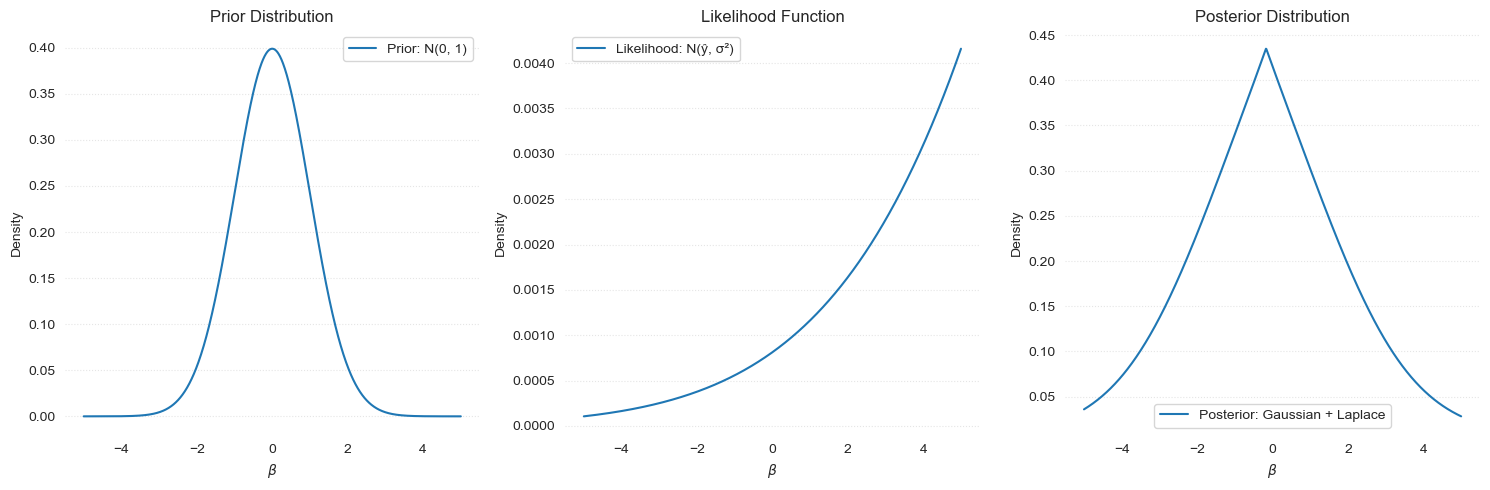

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

mu_prior = 0
sigma_prior = 1.0
beta_range = np.linspace(-5, 5, 1000)
prior = (1 / (np.sqrt(2 * np.pi) * sigma_prior)) * np.exp(-0.5 * ((beta_range - mu_prior) ** 2) / sigma_prior ** 2)
ax[0].plot(beta_range, prior, label="Prior: N(0, 1)")
ax[0].set_title('Prior Distribution')
ax[0].set_xlabel(r'$\beta$')
ax[0].set_ylabel('Density')
ax[0].legend()
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].yaxis.grid(True, ls=':', alpha=0.5)

mu_likelihood = np.mean(elastic_sklearn.predict(sm.add_constant(X)))
sigma_likelihood = np.std(elastic_sklearn.predict(sm.add_constant(X)))
likelihood = (1 / (np.sqrt(2 * np.pi) * sigma_likelihood)) * np.exp(-0.5 * ((beta_range - mu_likelihood) ** 2) / sigma_likelihood ** 2)
ax[1].plot(beta_range, likelihood, label="Likelihood: N(ŷ, σ²)")
ax[1].set_title('Likelihood Function')
ax[1].set_xlabel(r'$\beta$')
ax[1].set_ylabel('Density')
ax[1].legend()
for spine in ax[1].spines.values():
    spine.set_visible(False)
ax[1].grid(False)
ax[1].yaxis.grid(True, ls=':', alpha=0.5)

mu_posterior = elastic_sklearn.coef_.mean()
sigma_posterior = np.std(elastic_sklearn.coef_)
posterior = (1 / (np.sqrt(2 * np.pi) * sigma_posterior)) * np.exp(-0.5 * ((beta_range - mu_posterior) ** 2) / sigma_posterior ** 2) \
           + (1 / (2 * sigma_posterior)) * np.exp(-np.abs(beta_range - mu_posterior) / sigma_posterior) 
ax[2].plot(beta_range, posterior, label="Posterior: Gaussian + Laplace")
ax[2].set_title('Posterior Distribution')
ax[2].set_xlabel(r'$\beta$')
ax[2].set_ylabel('Density')
ax[2].legend()
for spine in ax[2].spines.values():
    spine.set_visible(False)
ax[2].grid(False)
ax[2].yaxis.grid(True, ls=':', alpha=0.5)

plt.tight_layout()
plt.show()